# Task 2 - Unemployment analysis in Python 

### Import all neccesary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [2]:
df1 = pd.read_csv("Unemployment in India.csv")
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocessing and Analysing the Dataset

In [3]:
#drop the null values
df1.dropna(inplace=True)

In [4]:
df1['Date'] = pd.to_datetime(df1[" Date"])

In [5]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Date'],
      dtype='object')

In [6]:
df1.rename({f'{df1.columns[2]}':'Frequency',f'{df1.columns[3]}': 'UnEmpRate',f'{df1.columns[4]}': 'Employed',f'{df1.columns[5]}': 'LabourPartRate',}, axis=1, inplace=True)
df1.drop(df1.columns[1],axis=1, inplace=True)
df1.head(5)

,Region,Frequency,UnEmpRate,Employed,LabourPartRate,Area,Date
0,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural,2019-05-31
1,Andhra Pradesh,Monthly,3.05,11755881.0,42.05,Rural,2019-06-30
2,Andhra Pradesh,Monthly,3.75,12086707.0,43.50,Rural,2019-07-31
3,Andhra Pradesh,Monthly,3.32,12285693.0,43.97,Rural,2019-08-31
4,Andhra Pradesh,Monthly,5.17,12256762.0,44.68,Rural,2019-09-30


In [7]:
#Replace " Monthly" with "Monthly" 
df1 = df1.replace(to_replace=" Monthly", value="Monthly")
df1['Frequency'].value_counts()

Monthly    740
Name: Frequency, dtype: int64

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          740 non-null    object        
 1   Frequency       740 non-null    object        
 2   UnEmpRate       740 non-null    float64       
 3   Employed        740 non-null    float64       
 4   LabourPartRate  740 non-null    float64       
 5   Area            740 non-null    object        
 6   Date            740 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [9]:
df1.describe()

,UnEmpRate,Employed,LabourPartRate
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [10]:
df1['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [11]:
North = ['Uttar Pradesh', 'Himachal Pradesh','Punjab', 'Jammu & Kashmir', 'Haryana', 'Delhi', 'Uttarakhand', 'Sikkim', 'Chandigarh']
South = ['Andhra Pradesh', 'Tamil Nadu', 'Kerala', 'Goa', 'Telangana', 'Puducherry']
East = ['Tripura', 'Assam', 'Bihar', 'Jharkhand','Meghalaya','Odisha', 'West Bengal']
West = ['Gujarat','Madhya Pradesh', 'Maharastra', 'Rajasthan']

In [12]:
North_India = df1.loc[df1.Region.apply(lambda x: x in North)]
South_India = df1.loc[df1.Region.apply(lambda x: x in South)]
East_India = df1.loc[df1.Region.apply(lambda x: x in East)]
West_India = df1.loc[df1.Region.apply(lambda x: x in West)]


In [24]:
df1['year'] = df1.Date.apply(lambda x : x.year)
df1['month'] = df1.Date.apply(lambda x : x.month)

In [25]:
df1.head()

,Region,Frequency,UnEmpRate,Employed,LabourPartRate,Area,Date,year,month
0,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural,2019-05-31,2019,5
1,Andhra Pradesh,Monthly,3.05,11755881.0,42.05,Rural,2019-06-30,2019,6
2,Andhra Pradesh,Monthly,3.75,12086707.0,43.50,Rural,2019-07-31,2019,7
3,Andhra Pradesh,Monthly,3.32,12285693.0,43.97,Rural,2019-08-31,2019,8
4,Andhra Pradesh,Monthly,5.17,12256762.0,44.68,Rural,2019-09-30,2019,9


In [33]:
df1.groupby(['year','month'])[['UnEmpRate']].describe()

UnEmpRate                                                        \
               count       mean        std   min      25%     50%      75%   
year month                                                                   
2019 5          54.0   8.874259   7.318345  0.00   3.6550   6.870  12.4975   
     6          54.0   9.303333   6.421573  0.00   4.7250   7.570  12.3525   
     7          54.0   9.033889   6.836556  0.00   3.7925   7.160  12.1600   
     8          53.0   9.637925   7.610977  0.37   4.6100   7.270  12.0600   
     9          52.0   9.051731   7.515934  0.00   4.3775   6.240  12.1250   
     10         55.0   9.900909   6.840587  1.13   4.7100   7.290  13.3850   
     11         55.0   9.868364   7.706733  0.00   4.3900   6.940  14.2950   
     12         53.0   9.497358   7.803618  0.41   4.2200   7.240  12.3700   
2020 1          53.0   9.950755   8.161929  0.57   4.2900   6.790  13.6800   
     2          53.0   9.964717   7.755462  0.00   4.3100   7.550  14.4800   
     3          52.0  10.700577   7.499659  0.62   5.2875   8.530  15.4750   
     4          51.0  23.641569  18.943933  0.00  11.2350  18.320  34.0250   
     5          51.0  24.875294  15.913111  2.22  14.5800  20.540  34.1150   
     6          50.0  11.903600   8.753140  0.00   4.9750  10.345  18.9375   

                   
              max  
year month         
2019 5      34.69  
     6      26.64  
     7      25.81  
     8      33.45  
     9      33.57  
     10     27.54  
     11     27.27  
     12     33.48  
2020 1      34.37  
     2      33.88  
     3      31.61  
     4      76.74  
     5      75.00  
     6      35.57

### How does the estimated unemployment level differ among different Indian states?

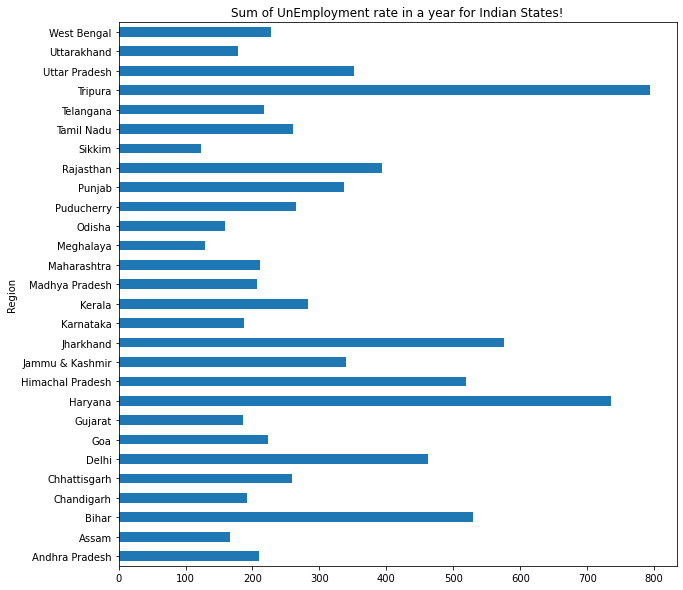

In [53]:
plt.figure(figsize=(10,10))

df1.groupby('Region').UnEmpRate.agg(sum).plot(kind='barh')

plt.title("Sum of UnEmployment rate in a year for Indian States!")

plt.show()

### How does the estimated unemployment rate compare between different regions of India (North, South, East, West)?

In [49]:
def giveAttributes(atr):

    medofdirection = []
    medofdirection.append(North_India[atr].quantile(.5))
    medofdirection.append(South_India[atr].quantile(.5))
    medofdirection.append(East_India[atr].quantile(.5))
    medofdirection.append(West_India[atr].quantile(.5))   

    return medofdirection

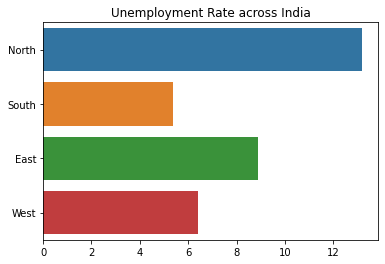

In [50]:
sns.barplot(x=giveAttributes('UnEmpRate'), y=['North', 'South', 'East', 'West'], orient='h')
plt.title("Unemployment Rate across India")
plt.show()

### How does the estimated labor participation rate vary among different Indian states?

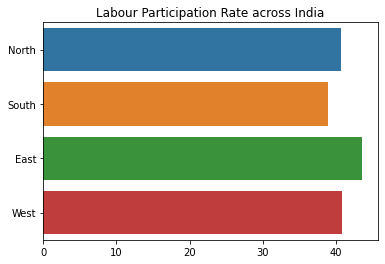

In [61]:
sns.barplot(x=giveAttributes('LabourPartRate'), y=['North', 'South', 'East', 'West'], orient='h')
plt.title("Labour Participation Rate across India")
plt.show()

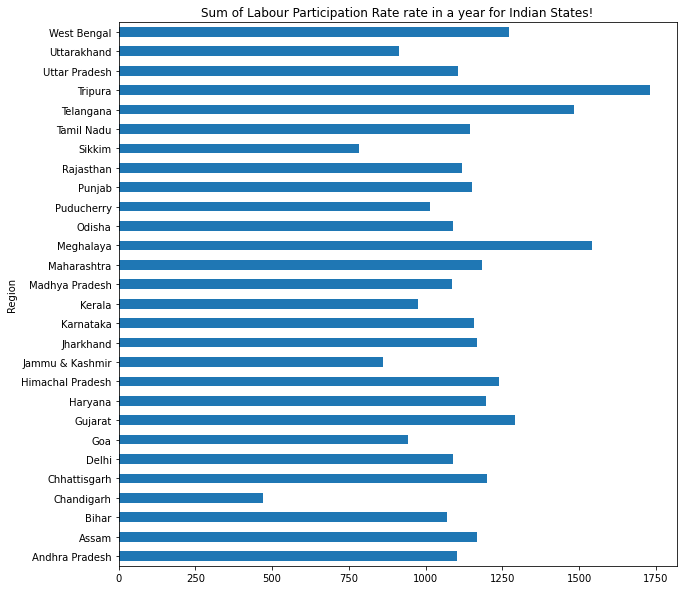

In [60]:
plt.figure(figsize=(10,10))

df1.groupby('Region').LabourPartRate.agg(sum).plot(kind='barh')

plt.title("Sum of Labour Participation Rate rate in a year for Indian States!")

plt.show()

### Are there any seasonal patterns in the unemployment rate across every Indian States?

Text(0.5, 1.0, 'Month wise display of Un employment Rate')

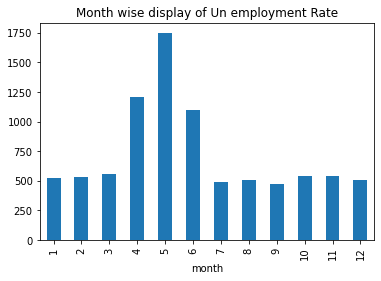

In [64]:
df1.groupby('month')['UnEmpRate'].agg(sum).plot(kind='bar')

plt.title("Month wise display of Un employment Rate")

### Are there any notable trends or changes in the unemployment rate over time for specific Indian states?

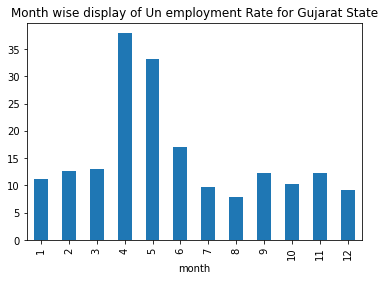

In [70]:
df_Guj = df1.loc[df1.Region == 'Gujarat']

df_Guj.groupby('month')['UnEmpRate'].agg(sum).plot(kind='bar')

plt.title("Month wise display of Un employment Rate for Gujarat State")

plt.show()